# Machine Learning Tutorial #3 - Principle Component Analysis


In [44]:
# import relevant libraries
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.utils.testing import ignore_warnings
from numpy import linalg as lin
sns.set()

## Principal Component Analysis 

The following algorithm is used to reduce the dimensionality of your dataset. <br>
Essentially, we extract the "useful" information from lets say 100 predictors, and <br>
put it in new, lets say 5 predictors. <br>
So Alot of useful information still intact, just in alot less features / predictors

In [45]:
# In this tutorial, we work with the MNIST data
with open("/home/tahir/Desktop/Datasets/mnistTVT.pickle", "rb") as f:
    Xtrain, Ttrain, Xval, Tval, Xtest, Ttest = pickle.load(f)

# read in the training datasets as 64-bit floats, to avoid numerical errors
Xtrain = Xtrain.astype(np.float64)
Xval = Xval.astype(np.float64)
Xtest = Xtest.astype(np.float64)

In [46]:
# Print the shapes of each training set to see the split
print(Xtrain.shape)
print(Xval.shape)
print(Xtest.shape)

(50000, 784)
(10000, 784)
(10000, 784)


### Implementing PCA with Sklearn

In [47]:
def my_PCA(train_X,test_X, num_components):
    # Project the MNIST dataset on a 30-dimensional subspace
    pca = PCA(n_components=num_components)  # Reducing the dimensions from 784 to 30 
    # Fit the training data
    pca.fit(Xtrain)

    # Apply the dimensinality reduction on the test data
    reduced_data = pca.transform(Xtest)
    print("The low dimensionality representation is:", reduced_data.shape) 

    # Transform the low-dimensional representation back to original
    # Note that although this is back to higher dimensions, all of the useful information is in the first 30 components
    projected_data = pca.inverse_transform(reduced_data)
    print(f"Projected data from PCA is:{projected_data.shape[1]}, but the information is in {reduced_data.shape[1]} components" )
    
    # Plotting - Reshape the data to illustrate images
    X = np.reshape(projected_data, [-1,28,28])
    plt.figure()

    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(X[i], cmap="Greys")
        plt.axis("off")

    return

### Visualization - Different Number of Components

The low dimensionality representation is: (10000, 10)
Projected data from PCA is:784, but the information is in 10 components
 


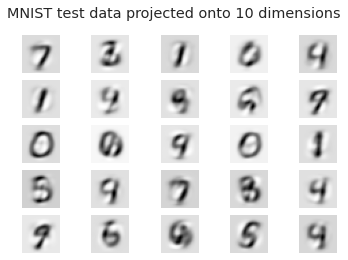

In [48]:
# Call the function and plot it with different num of components 

# 10 dimensions
num_components = 10
my_PCA(Xtrain,Xtest,num_components)
plt.suptitle(f"MNIST test data projected onto {num_components} dimensions" )
print(" ")

The low dimensionality representation is: (10000, 30)
Projected data from PCA is:784, but the information is in 30 components
 


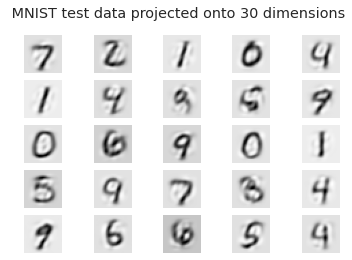

In [49]:
# 30 dimensions
num_components = 30
my_PCA(Xtrain,Xtest,num_components)
plt.suptitle(f" MNIST test data projected onto {num_components} dimensions" )
print(" ")

The low dimensionality representation is: (10000, 100)
Projected data from PCA is:784, but the information is in 100 components
 


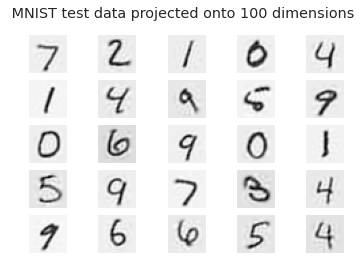

In [50]:
# 100 dimensions
num_components = 100
my_PCA(Xtrain,Xtest,num_components)
plt.suptitle(f" MNIST test data projected onto {num_components} dimensions" )
print(" ")

The low dimensionality representation is: (10000, 300)
Projected data from PCA is:784, but the information is in 300 components
 


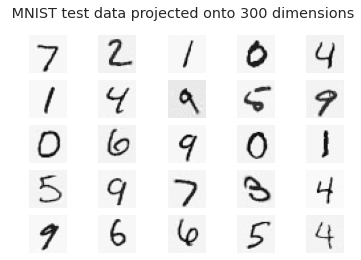

In [51]:
# 300 dimensions
num_components = 300
my_PCA(Xtrain,Xtest,num_components)
plt.suptitle(f" MNIST test data projected onto {num_components} dimensions" )
print(" ")

As we can see, even from 784 to 30 dimensions, the numbers can be seen properly! (Extremely useful in reducing dimensionality of a dataset)

### Implementing PCA from scratch

PCA Algorithm steps: 
1) subtract the mean from your xi's <br> 
2) Find the eigen values and eigen vectors, take top K components <br>
3) Get top K components <br>
4) Project onto a subspace and add the mean back <br> 

In [52]:
def myPCA(data, K_components):
    
    # Step 1
    # Compute the mean which will represent the new origin
    mu = np.mean(data, axis=0) # Compute the mean for each column
    data = data - mu
    
    # Step 2
    # Calculate the covariance matrix and extract the corresponding eigen values and vectors
    cov_matrix = np.cov(data.T) # Calculate the covariance matrix
    eigen_vals, eigen_vectors = lin.eigh(cov_matrix)

    
    # Step 3 
    # Sort it from increasing to decreasing order then get top K components (the top eigen vectors)
    sort_eigen_vals = np.argsort(eigen_vals)[::-1]  
    eigen_vals = eigen_vals[sort_eigen_vals] 
    eigen_vectors = eigen_vectors[:, sort_eigen_vals]
    Top_K_components = eigen_vectors[:,:K_components]

    # Step 4
    z = np.dot(data, Top_K_components) # lower dimensional Representation
    # Project on the reduced dimensions
    proj = np.dot(z,Top_K_components.T)
    # Add the mean back
    data_projected = mu + proj  
    
    return data_projected
    

### Visualize our results and compare with the sklearn implementation

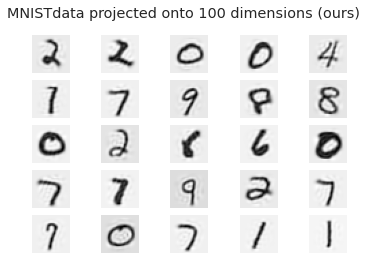

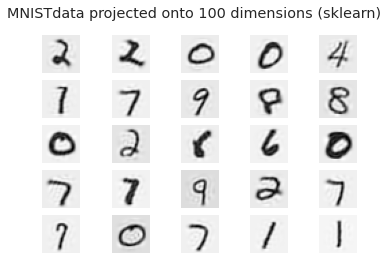

In [53]:
MyPCAprojected = myPCA(data=Xtrain, K_components=100)

def plot_PCA(X):
    X = np.reshape(X, [-1,28,28])
    plt.figure()
    
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(X[i], cmap="Greys")
        plt.axis("off")

    return None
plot_PCA(MyPCAprojected)
plt.suptitle("MNISTdata projected onto 100 dimensions (ours)")
print(" ")


# With SKlearn
pca = PCA(n_components = 100, svd_solver="full" )
pca.fit(Xtrain)
reducedData = pca.transform(Xtrain)
XtrainP = pca.inverse_transform(reducedData)

# Plot the 25 digits made with sklearn
plot_PCA(XtrainP)
plt.suptitle("MNISTdata projected onto 100 dimensions (sklearn)")
print(" ")

In [54]:
# Compute RMS to see how far off we were -- The difference is very small! :) 
rms = np.sqrt( np.mean((XtrainP-MyPCAprojected)**2) )
print(rms)

1.3400320298276219e-15
